# Data Analysis

In this stage we will modeling the data and try understanding the impact of the exogenous attributes in the sales using Pearson Correlation Coefficient with the goal of discovering some useful for our Machine Learning model. 

The Pearson Correlation Coefficient is a way to measure the correlation between the dependent variable and an independent variable. It has a range -1 to 1, where -1 represents a strong negative correlation, 0 represents a null correlation and 1 a strong positive correlation.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

Importing all the dataframe created in the previous steps

In [2]:
category1_TS = pd.read_csv("category1_TS.csv", sep = ",")
category2_TS = pd.read_csv("category2_TS.csv", sep = ",")
category3_TS = pd.read_csv("category3_TS.csv", sep = ",")
Russia_GDP = pd.read_csv("Russia_GDP_Estimated.csv", sep = ",")
MOEX = pd.read_csv("MOEX.csv", sep = ",")
RubinDolar = pd.read_csv("RubinDolar.csv", sep = ",")
unemploymentRate = pd.read_csv("unemploymentRate.csv", sep = ",")

In [3]:
category1_TS.head()

,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter
0,2013-01-01,1479.487115,128,189374.350769,1,1,1
1,2013-01-02,1561.694303,525,819889.508928,2,1,1
2,2013-01-03,1483.195423,443,657055.572183,3,1,1
3,2013-01-04,1532.475859,399,611457.867576,4,1,1
4,2013-01-05,1490.351956,399,594650.430267,5,1,1


Merging the dataframes for each dataset that will be analyze

In [4]:
# Merging with the PS3 Games dataset
category1_TS = pd.merge(category1_TS,Russia_GDP, on = 'Date')
category1_TS = pd.merge(category1_TS,MOEX, on = 'Date')
category1_TS = pd.merge(category1_TS,RubinDolar, on = 'Date')
category1_TS = pd.merge(category1_TS,unemploymentRate, on = 'Date')
category1_TS['Date'] = pd.to_datetime(category1_TS['Date'], format = '%Y.%m.%d')

# Merging with the Game Consoles - PS4 dataset
category2_TS = pd.merge(category2_TS,Russia_GDP, on = 'Date')
category2_TS = pd.merge(category2_TS,MOEX, on = 'Date')
category2_TS = pd.merge(category2_TS,RubinDolar, on = 'Date')
category2_TS = pd.merge(category2_TS,unemploymentRate, on = 'Date')
category2_TS['Date'] = pd.to_datetime(category2_TS['Date'], format = '%Y.%m.%d')

# Merging with the  PS4 Games dataset
category3_TS = pd.merge(category3_TS,Russia_GDP, on = 'Date')
category3_TS = pd.merge(category3_TS,MOEX, on = 'Date')
category3_TS = pd.merge(category3_TS,RubinDolar, on = 'Date')
category3_TS = pd.merge(category3_TS,unemploymentRate, on = 'Date')
category3_TS['Date'] = pd.to_datetime(category3_TS['Date'], format = '%Y.%m.%d')

In [5]:
category1_TS.columns = ['Date','Price','Freq','Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']
category2_TS.columns = ['Date','Price','Freq','Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']
category3_TS.columns = ['Date','Price','Freq','Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']
category1_TS.head()

,Date,Price,Freq,Invoice,Dayofweek,Weekofyear,Quarter,GDP,IMOEX,RubinDolar,UnempRate
0,2013-01-01,1479.487115,128,189374.350769,1,1,1,2.297128e+12,1526.98,0.0327,1.349174
1,2013-01-02,1561.694303,525,819889.508928,2,1,1,2.297498e+12,1526.98,0.0327,1.338910
2,2013-01-03,1483.195423,443,657055.572183,3,1,1,2.297862e+12,1526.98,0.0331,1.330354
3,2013-01-04,1532.475859,399,611457.867576,4,1,1,2.298220e+12,1526.98,0.0330,1.323307
4,2013-01-05,1490.351956,399,594650.430267,5,1,1,2.298573e+12,1526.98,0.0330,1.317583


## The impact of features on the PS3 Games invoices

Our target variable is the invoice and the others variables like Price, Freq, Dayofweek, Weekofyear, Quarter, GDP, IMOEX, Rub in Dollar and Unemployment Rate are our independent variables, so we will analyze the correlation and the impact for each independent variable separately in our dependent variable, trying understanding the business impact and extracting insights. 

In the first moment we will analyze the Pearson Matrix, it is a matrix of the correlation between each variable with each others.

In [6]:
Variables = category1_TS[['Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']]
Matrix = Variables.corr()
Matrix

,Invoice,Dayofweek,Weekofyear,Quarter,GDP,IMOEX,RubinDolar,UnempRate
Invoice,1.000000,0.318984,0.133825,0.207234,0.449904,0.372359,0.376848,0.115176
Dayofweek,0.318984,1.000000,-0.003130,-0.008172,0.000303,0.000938,0.003248,-0.002301
Weekofyear,0.133825,-0.003130,1.000000,0.941106,-0.031542,0.011955,0.060037,0.047788
Quarter,0.207234,-0.008172,0.941106,1.000000,-0.013045,0.028514,0.078633,0.044519
GDP,0.449904,0.000303,-0.031542,-0.013045,1.000000,0.872205,0.927047,0.430963
IMOEX,0.372359,0.000938,0.011955,0.028514,0.872205,1.000000,0.953709,0.426890
RubinDolar,0.376848,0.003248,0.060037,0.078633,0.927047,0.953709,1.000000,0.336151
UnempRate,0.115176,-0.002301,0.047788,0.044519,0.430963,0.426890,0.336151,1.000000


Plotting the HeatMap to easier visualization about the exogenous vars influency 

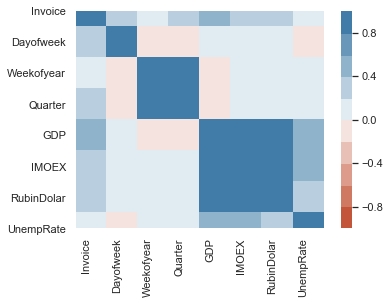

In [7]:
ax = sns.heatmap(Matrix, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 240, n=10),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

We can see that there isn't a independent var that impact a lot our invoice, where is the greater correlation is with the GDP

Knowing that correlation doesn't imply causation, we can notice that the most important features that can impact the invoices in the Game Market are Dayofweek, GDP, IMOEX and the value of RUB in Dollar, all of them is a weak correlation, but have some impact. Let's visualize this information to see how they're related.


(0, 1437603.1052589454)

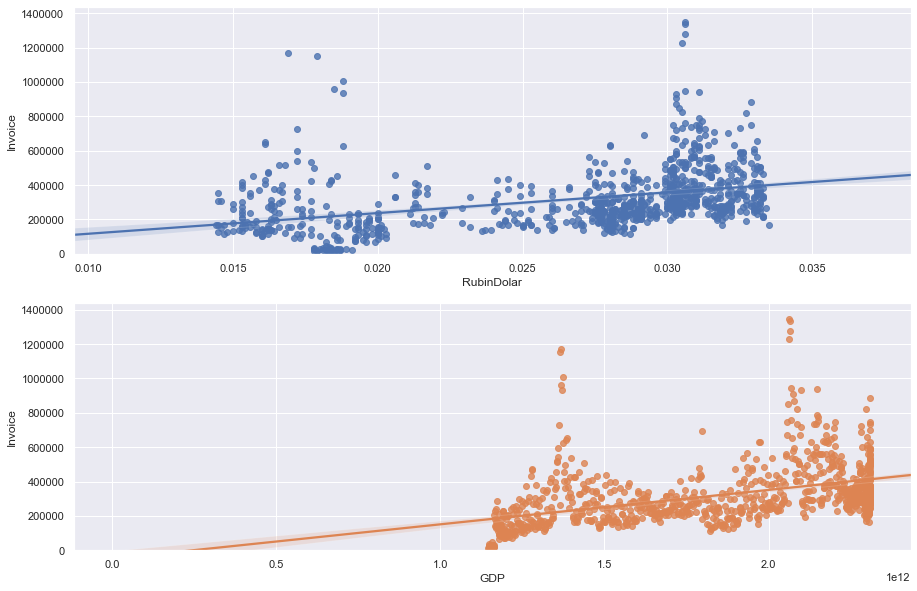

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
sns.regplot(x="RubinDolar", y="Invoice", data=Variables, ax=ax1)
sns.regplot(x="GDP", y="Invoice", data=Variables, ax=ax2)
plt.ylim(0,)

Analyze the Rub in Dollar and GDP impact on the invoices we can notice that the correlation of both is positive (Pearson Correlation is positive) ie as GDP and Rub in Dollar increase invoice increase.

(0, 1432219.0632725304)

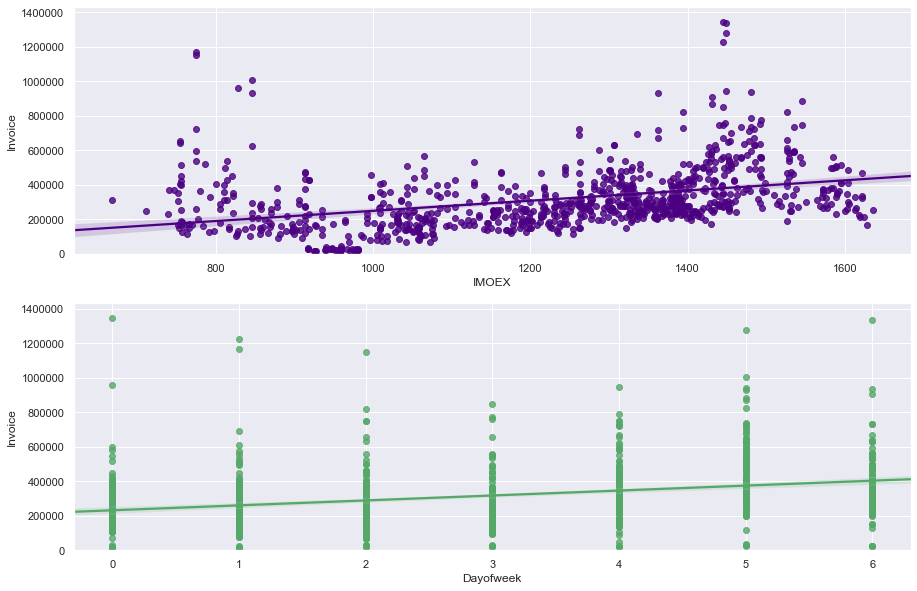

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
sns.regplot(x="IMOEX", y="Invoice", data=Variables, ax=ax1, color= 'indigo')
sns.regplot(x="Dayofweek", y="Invoice", data=Variables, ax=ax2, color = 'g')
plt.ylim(0,)

We can get the same conclusion of the previous analyze for the Moex Index impact on invoices. In the Day of week case, we can notice that the sales increase on fridays and saturdays, let's see this in the boxplot, to ignore the outliers.

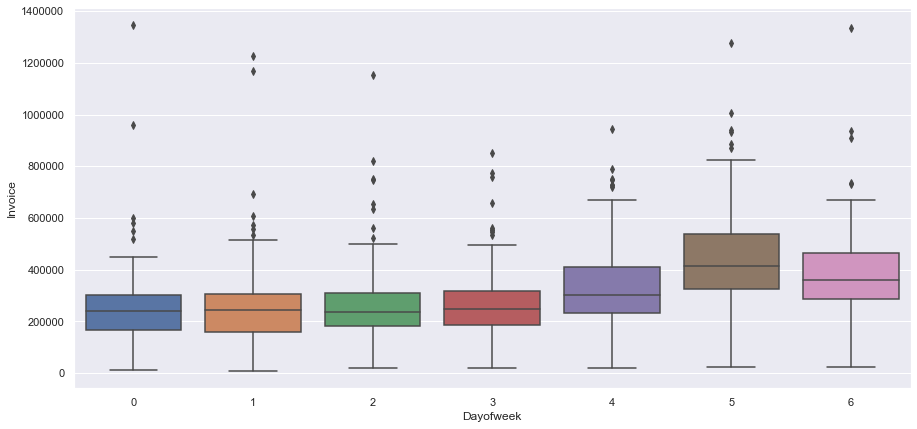

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Dayofweek", y="Invoice", data=Variables, fliersize=5)

Explorying the boxplot, we can see in detail that the average invoices increase, not only on fridays and saturday, but in sunday too. The black lozenges in the boxplot means the outliers that it can be discarded.

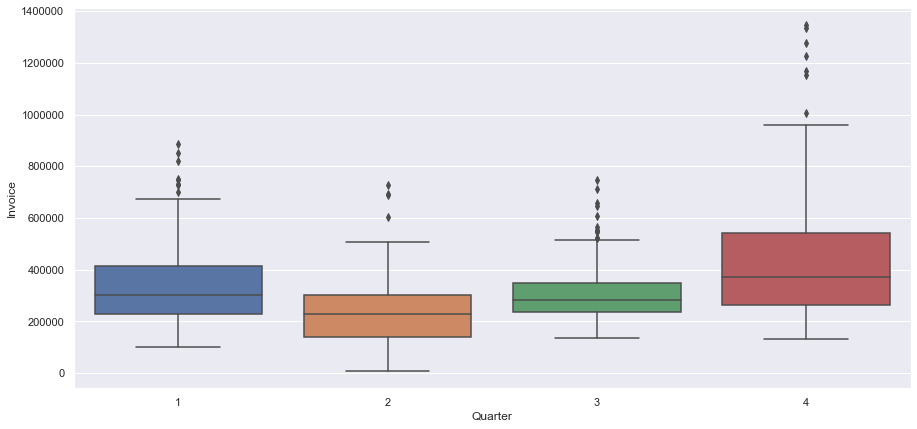

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Quarter", y="Invoice", data=Variables, fliersize=5)

## The impact of features on the Consoles PS4 invoices

In [12]:
Variables2 = category2_TS[['Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']]
Matrix2 = Variables2.corr()
Matrix2

,Invoice,Dayofweek,Weekofyear,Quarter,GDP,IMOEX,RubinDolar,UnempRate
Invoice,1.000000,0.204639,0.248400,0.305090,-0.294728,-0.397450,-0.358674,-0.043137
Dayofweek,0.204639,1.000000,0.006784,-0.003999,0.004171,0.007039,0.008054,0.000029
Weekofyear,0.248400,0.006784,1.000000,0.932113,0.025103,0.138633,0.174708,0.215118
Quarter,0.305090,-0.003999,0.932113,1.000000,0.041997,0.145729,0.192177,0.180268
GDP,-0.294728,0.004171,0.025103,0.041997,1.000000,0.826724,0.896151,-0.600325
IMOEX,-0.397450,0.007039,0.138633,0.145729,0.826724,1.000000,0.950268,-0.254352
RubinDolar,-0.358674,0.008054,0.174708,0.192177,0.896151,0.950268,1.000000,-0.437370
UnempRate,-0.043137,0.000029,0.215118,0.180268,-0.600325,-0.254352,-0.437370,1.000000


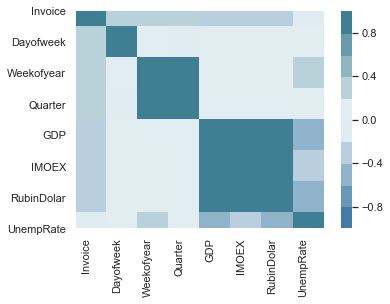

In [13]:
ax = sns.heatmap(Matrix2, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(600, 220, n=10),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

Instead sales of PS3 Games, the Quarter of year impact a lot more than day of week, it's make total sense due the end of the years, in my common sense. Unlike the PS3 games sales the economy variables have a negative correlation in console PS4 sales, the independent variable with the most impact on console PS4 invoice is the Moex index, inversely proportional. It is very curious and I check the code a lot of time to trust in this results, because it goes against my understanding of the market. We don't waste more time reading my amazement, let's plot the graphs.

(0, 1213932.412075699)

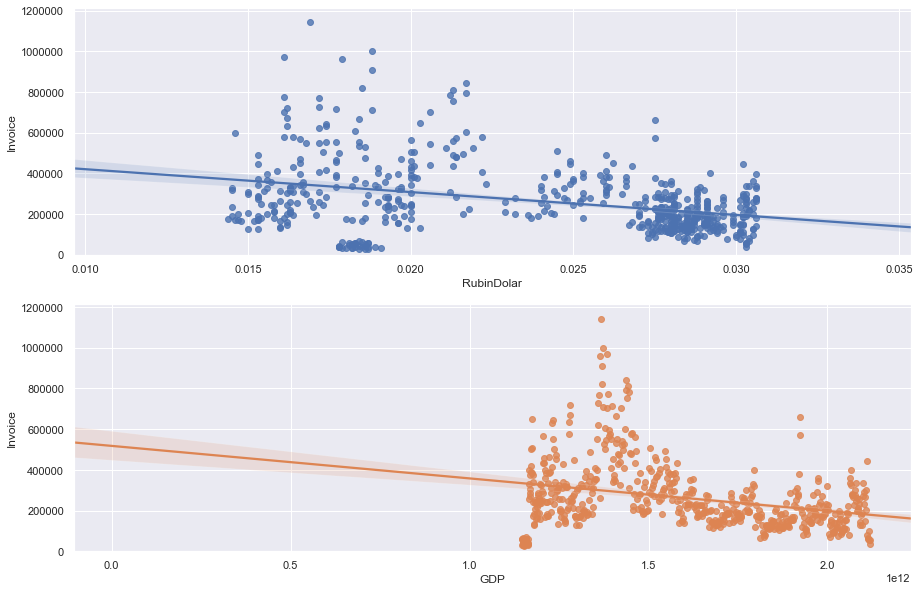

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
sns.regplot(x="RubinDolar", y="Invoice", data=Variables2, ax=ax1)
sns.regplot(x="GDP", y="Invoice", data=Variables2, ax=ax2)
plt.ylim(0,)

(0, 1213922.091146628)

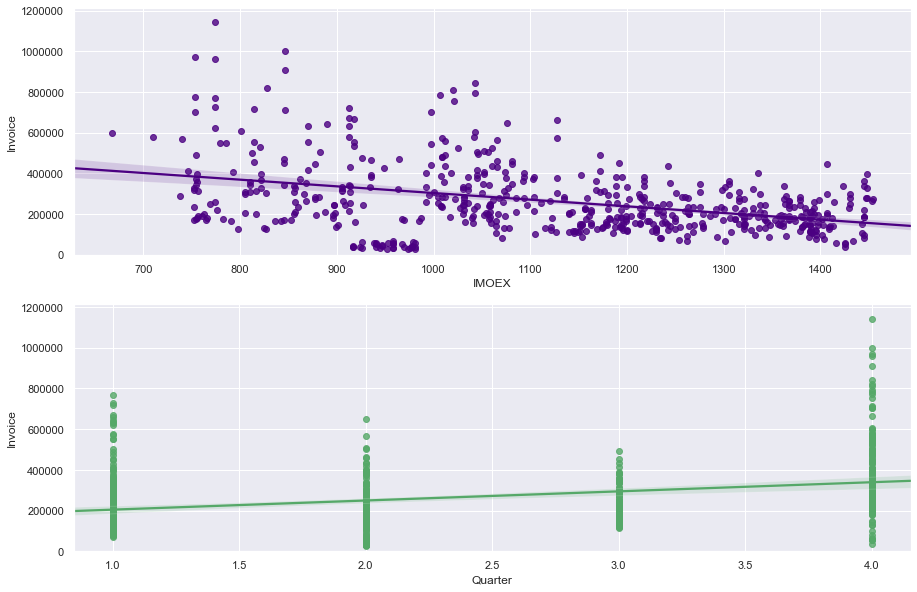

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
sns.regplot(x="IMOEX", y="Invoice", data=Variables2, ax=ax1, color= 'indigo')
sns.regplot(x="Quarter", y="Invoice", data=Variables2, ax=ax2, color = 'g')
plt.ylim(0,)

Understanding the correlation we can extracting the information that the consoles PS4 sales are inversely proportional the Russia economy, it means, if the economy is going bad we can expect a increase in the console PS4 sales. We aren't going to social ambit discussion, but it can be caused by a politics strategies where the goverment reduce the tax to increase the consumption, maybe we will try understand it searching for more data and information to try justify it in the next steps.

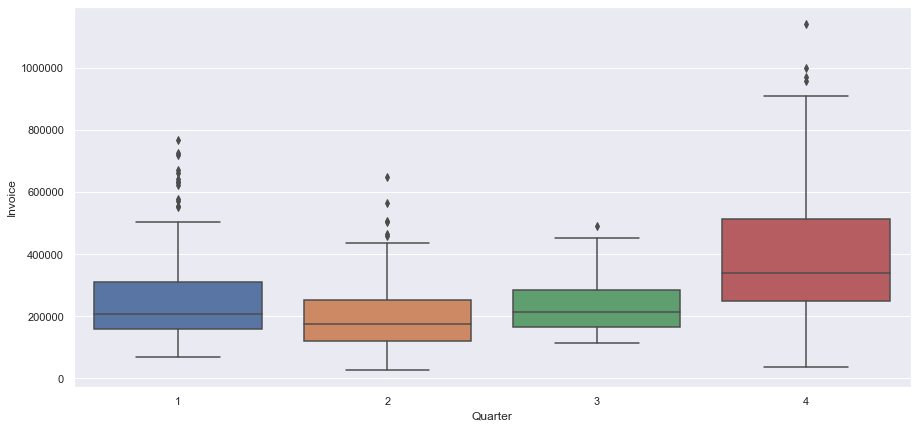

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Quarter", y="Invoice", data=Variables2, fliersize=5)

Analizing the quarter of years, we can arrive at a conclusion of the common sense, that is the sales increase in the ends of the years, maybe the fact is the festive season like christmas, the second quarter is the most bad to the consoles PS4 sales, this facts about the seasonality is very important to identify, we can inform the models that there is a weight in the sales during the 4th quarter of the year. The next step about this path is resample the time serie and see if this seasonality repeat during the 2013 to 2015. The quarter seasonality found in this Console PS4 boxplot is the same that found PS3 Games boxplot.

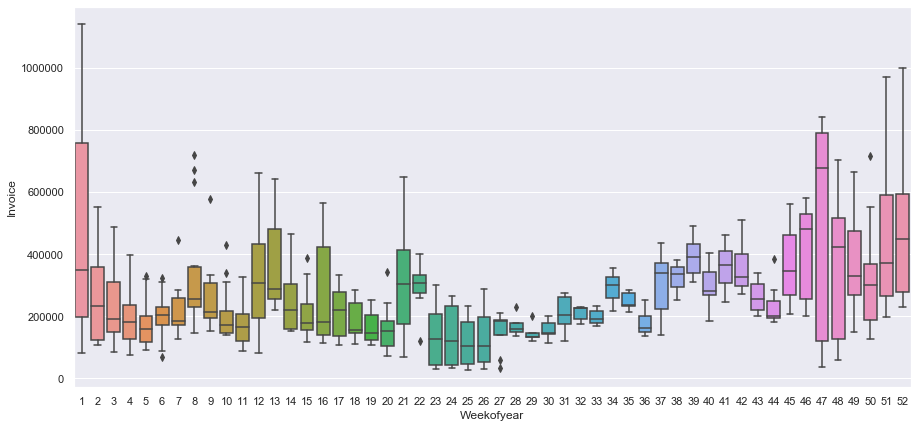

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Weekofyear", y="Invoice", data=Variables2, fliersize=5)

Notice that the average sales increase on 46th, 47th and 52th week of year, it represent 2nd and 3rd week on november and the last week on december. Thus we have a curious analyze, that is, we can expect that the november sales is higher than december sales.

## The impact of features on the PS4 Games invoices

In [18]:
Variables3 = category3_TS[['Invoice','Dayofweek','Weekofyear','Quarter','GDP','IMOEX','RubinDolar','UnempRate']]
Matrix3 =Variables3.corr()
Matrix3 

,Invoice,Dayofweek,Weekofyear,Quarter,GDP,IMOEX,RubinDolar,UnempRate
Invoice,1.000000,0.158838,0.454957,0.499420,0.139402,-0.020053,0.061815,-0.195239
Dayofweek,0.158838,1.000000,0.004900,-0.005868,0.002561,0.011069,0.008044,0.004264
Weekofyear,0.454957,0.004900,1.000000,0.931419,-0.000693,0.118726,0.163218,0.208515
Quarter,0.499420,-0.005868,0.931419,1.000000,0.005911,0.119460,0.173249,0.192691
GDP,0.139402,0.002561,-0.000693,0.005911,1.000000,0.822255,0.892547,-0.615990
IMOEX,-0.020053,0.011069,0.118726,0.119460,0.822255,1.000000,0.950233,-0.255089
RubinDolar,0.061815,0.008044,0.163218,0.173249,0.892547,0.950233,1.000000,-0.437055
UnempRate,-0.195239,0.004264,0.208515,0.192691,-0.615990,-0.255089,-0.437055,1.000000


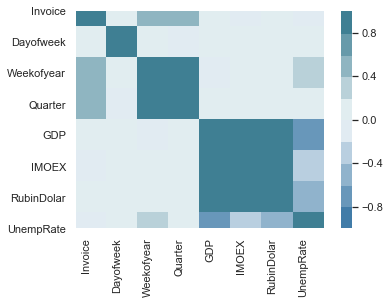

In [19]:
ax = sns.heatmap(Matrix3, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(600, 220, n=10),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

The correlation table informs that the economy doesn't have any considerable effect on PS4 Games sales, and the Quarter of year have a moderate positive correlation (R ~ 0.5), follow by Weekofyear.

(-20, 1087837.4392088023)

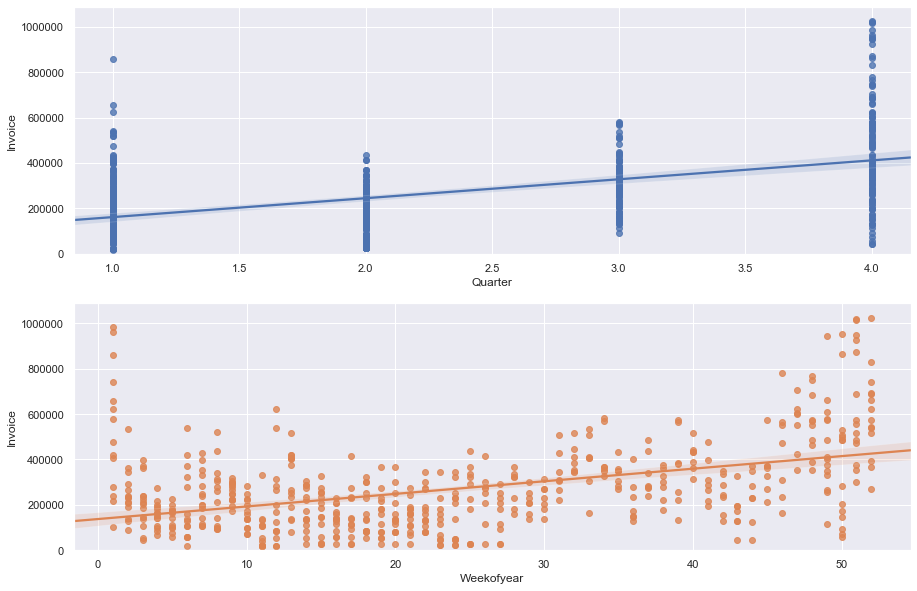

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
sns.regplot(x="Quarter", y="Invoice", data=Variables3, ax=ax1)
sns.regplot(x="Weekofyear", y="Invoice", data=Variables3, ax=ax2)
plt.ylim(-20,)

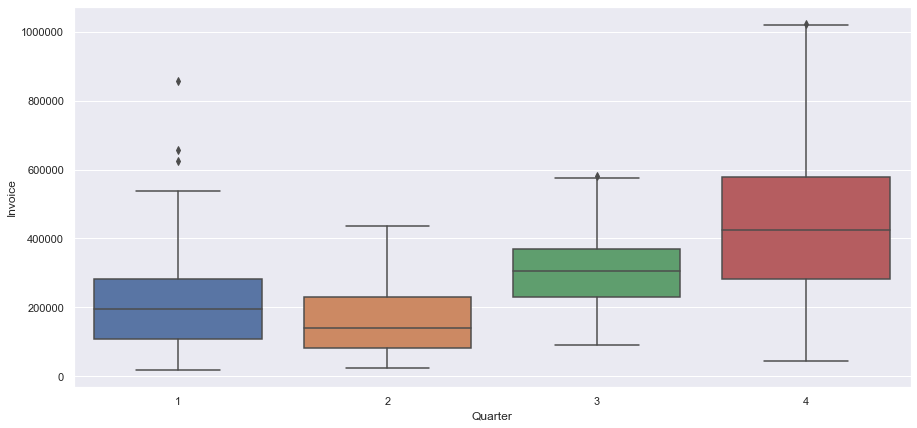

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Quarter", y="Invoice", data=Variables3, fliersize=5)

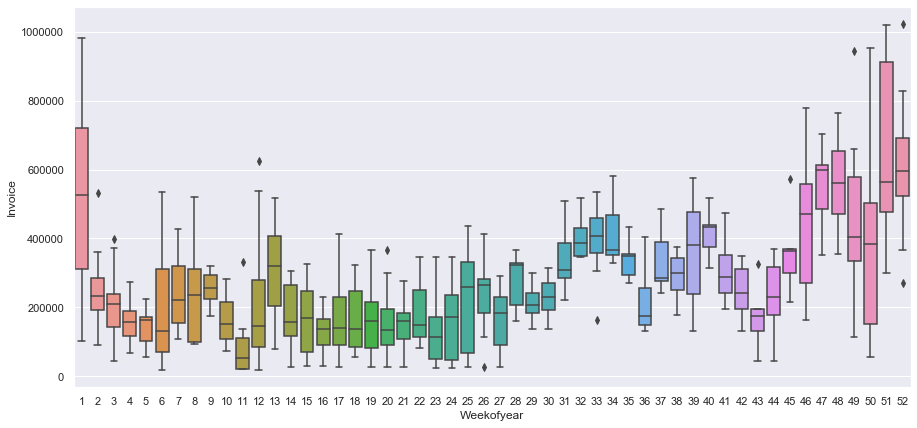

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Weekofyear", y="Invoice", data=Variables3, fliersize=5)

In this two boxplots we can obtain the information about the PS4 Games sales during the year, and just like the previous analyzes we can notice a sazonality, where the higher sales occur on 4th quarter, end of the year.

In [23]:
Variables3.head()

,Invoice,Dayofweek,Weekofyear,Quarter,GDP,IMOEX,RubinDolar,UnempRate
0,765755.202819,4,48,4,2.109661e+12,1406.51,0.0302,1.232103
1,748764.008658,5,48,4,2.108224e+12,1406.51,0.0302,1.230805
2,569473.956456,6,48,4,2.106782e+12,1406.51,0.0302,1.229489
3,402710.000000,0,49,4,2.105336e+12,1402.93,0.0302,1.228156
4,348833.666667,1,49,4,2.103886e+12,1398.74,0.0301,1.226806


Creating a dataframe in .csv format to simplify the loading in the next steps, we will select only the independent variable with correlation greater than 0.3.

In [24]:
# Create the dataset with the important features
df_PS3Games = category1_TS[['Date','Price','Freq','Invoice','Dayofweek','GDP','IMOEX','RubinDolar']]
df_PS4Games = category2_TS[['Date','Price','Freq','Invoice','Quarter','GDP','IMOEX','RubinDolar']]
df_ConsolesPS4 = category3_TS[['Date','Price','Freq','Invoice','Weekofyear','Quarter']]
# export datafram to csv
df_PS3Games.to_csv("df_PS3Games.csv", header = True, index = False)
df_PS4Games.to_csv("df_PS4Games.csv", header = True, index = False)
df_ConsolesPS4.to_csv("df_ConsolesPS4.csv", header = True, index = False)

# Conclusion

So, in short, we can say that the week of year, quarter of year and the unemployment rate don't have a relavant correlation (Pearson Correlation(R) > 0.3) with our target variable on PS3 Games invoices, then we can take off them of our analyze, in my common sense I would say that the unemployment rate would increase the sales in Game market, ( because the people would have more time to play :D (LOL)) but the unemployment rate doesn't impact any of our 3 analyzes. 

The Day of week, Moex Index, GDP and Rub in Dollar have a impact in our PS3 Games and Console PS4 analyzes and we will keep it as a features to support the models predict the invoices in the next steps. In the PS4 Games analyze we can see that it is impacted just by week of year and quarter of year representing a sazonality in sales of this category. The Russia Economy has a negative correlation on Consoles PS4 invoices, we will keep it, although weak there is a correlation. 

Rub in Dollar, Moex and GDP have a relation with the economy in the country and according one of them increase the others tend to increase too, but all this information can help our future models understanding the Games Market and help us extract some insights.